<a href="https://colab.research.google.com/github/Carambolushka/Iris/blob/main/Iris_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

In [ ]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')

In [ ]:
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [ ]:
iris_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [ ]:
x_train = iris_train[['sepal length','sepal width','petal length','petal width']]
y_train = iris_train.species

In [ ]:
x_test = iris_test[['sepal length','sepal width','petal length','petal width']]
y_test = iris_test.species

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(223.2, 1223.1, 'petal width <= 0.8\nentropy = 1.581\nsamples = 100\nvalue = [35, 30, 35]'),
 Text(111.6, 951.3, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(334.79999999999995, 951.3, 'petal width <= 1.75\nentropy = 0.996\nsamples = 65\nvalue = [0, 30, 35]'),
 Text(223.2, 679.5, 'petal length <= 4.95\nentropy = 0.439\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(111.6, 407.69999999999993, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(334.79999999999995, 407.69999999999993, 'sepal length <= 6.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(223.2, 135.89999999999986, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(446.4, 135.89999999999986, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.4, 679.5, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

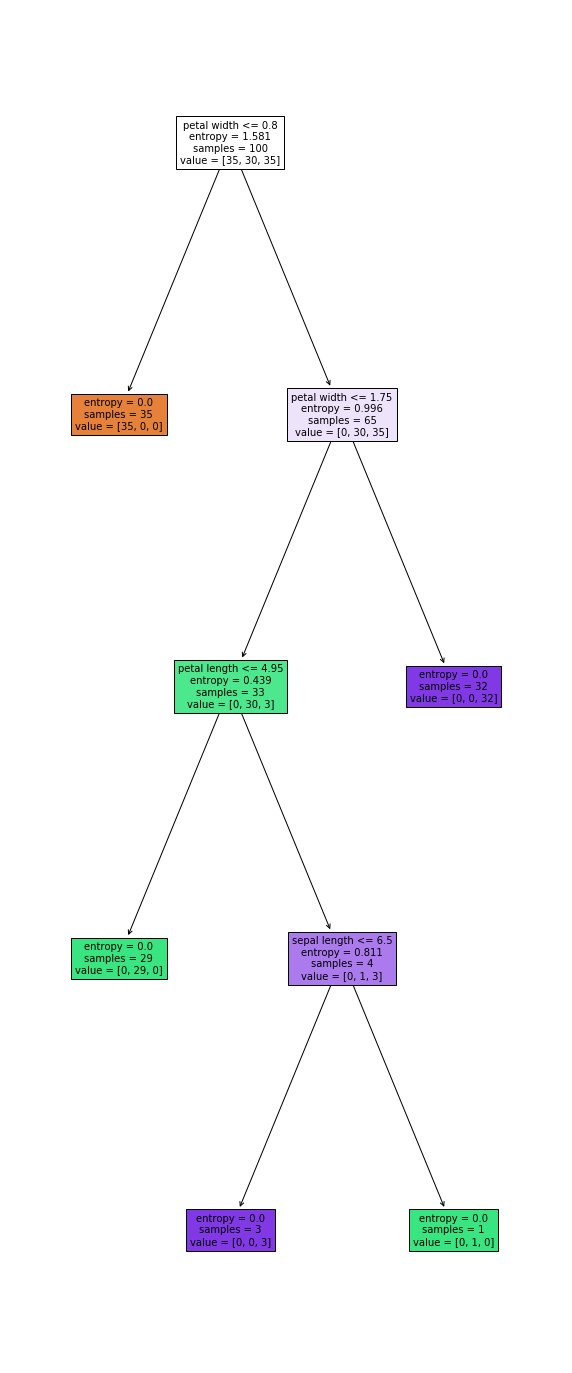

In [ ]:
plt.figure(figsize=(10, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(x), filled=True)

In [ ]:
clf.score(x,y)

1.0

In [ ]:
tree_depth = range(1,100)

In [ ]:
ans_data = pd.DataFrame()

In [ ]:
np.random.seed(0)
for depth in tree_depth:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(x_train,y_train)
    train_score = clf.score(x_train,y_train)
    test_aquracy = clf.score(x_test,y_test)

    score_data = pd.DataFrame({'depth':[depth], 'train_score':[train_score], 'test_aquracy':[test_aquracy]})

    ans_data = ans_data.append(score_data)

In [ ]:
ans_data.head()

,depth,train_score,test_aquracy
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [ ]:
final_data = pd.melt(ans_data, id_vars=['depth'],\
                     value_vars = ['train_score','test_aquracy'],\
                     var_name ='type')

In [ ]:
final_data.head()

,depth,type,value
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


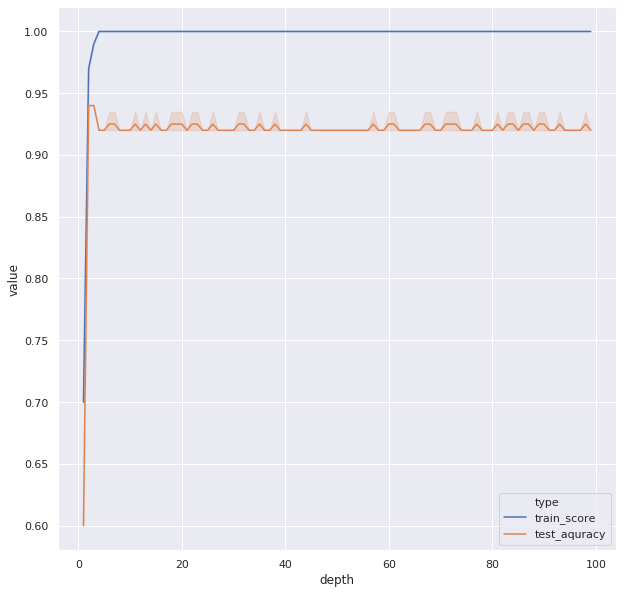

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x = 'depth', y = 'value', hue = 'type', data = final_data)